# Data Scaling

In [2]:
getwd()

[1] "H:/Education/edu-r/EK/Data Analysis"

In [4]:
data <- read.csv("../../DM/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
head(data)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [7]:
str(data)

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : chr  "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : chr  "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr  "Yes" "No" "No" "No" ...
 $ Dependents      : chr  "No" "No" "No" "No" ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr  "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr  "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr  "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr  "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr  "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr  "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr  "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr  "No" "No" "No" "No" ...
 $ StreamingMovies : chr  "No" "No" "No" "No" ...
 $ Contract        : chr  "Month-to-month" "One year" "Month-to-month" "One year" ...
 $ PaperlessBilling: chr  "Yes"

In [9]:
summary(data)

  customerID           gender          SeniorCitizen      Partner         
 Length:7043        Length:7043        Min.   :0.0000   Length:7043       
 Class :character   Class :character   1st Qu.:0.0000   Class :character  
 Mode  :character   Mode  :character   Median :0.0000   Mode  :character  
                                       Mean   :0.1621                     
                                       3rd Qu.:0.0000                     
                                       Max.   :1.0000                     
                                                                          
  Dependents            tenure      PhoneService       MultipleLines     
 Length:7043        Min.   : 0.00   Length:7043        Length:7043       
 Class :character   1st Qu.: 9.00   Class :character   Class :character  
 Mode  :character   Median :29.00   Mode  :character   Mode  :character  
                    Mean   :32.37                                        
                    3rd Qu.:55

In [11]:
library(ggplot2)

Warning message:
"Removed 11 rows containing non-finite values (`stat_bin()`)."


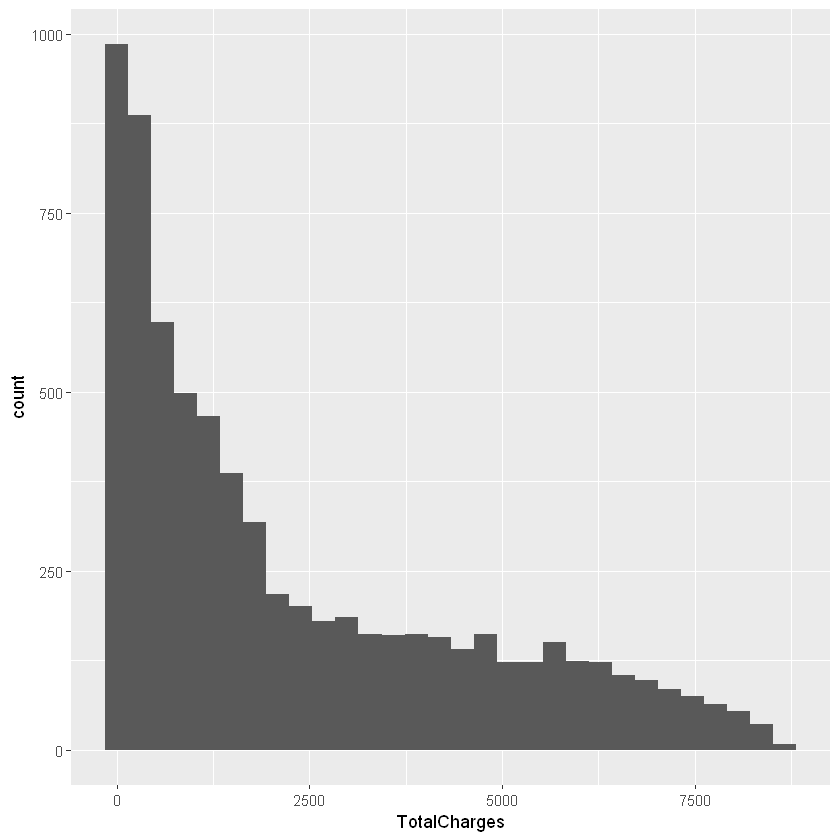

In [13]:
ggplot(data = data, aes(x = TotalCharges)) +
    geom_histogram(bins = 30)

In [25]:
library(dplyr)
data <- data |>
    mutate(TotalCharges = ifelse(is.na(TotalCharges), 0, TotalCharges))

In [26]:
summary(data$TotalCharges)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   398.6  1394.5  2279.7  3786.6  8684.8 

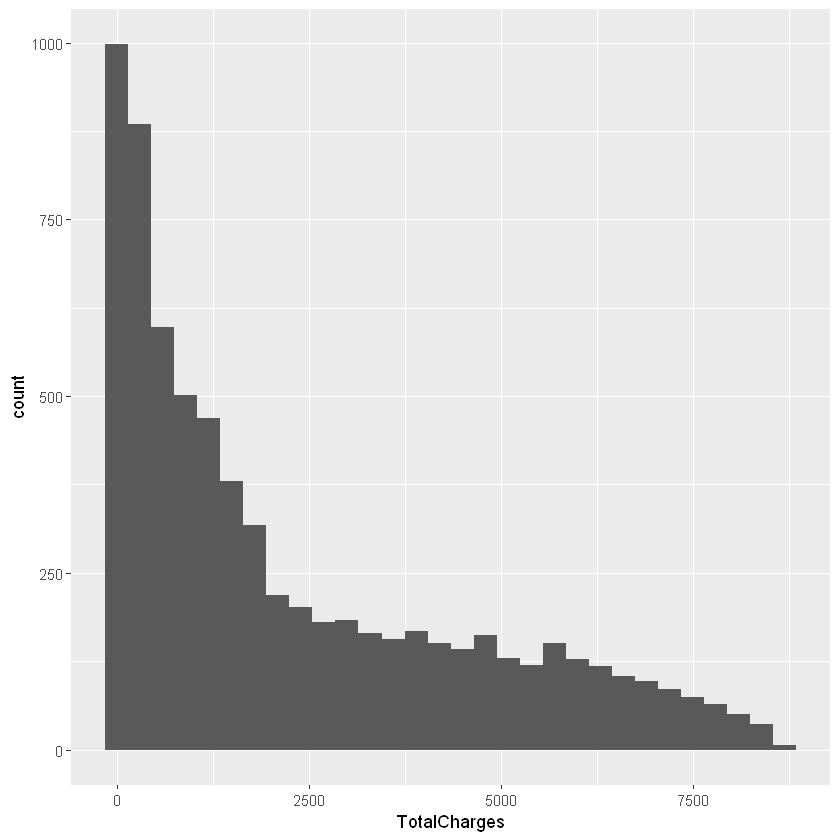

In [28]:
ggplot(data = data, aes(x = TotalCharges)) +
    geom_histogram(bins = 30)

In [30]:
normalizeFunc <- function(x) {
    return ((x - min(x))/(max(x) - min(x)))
}

In [32]:
data <- data |>
    mutate(TotalNorm = normalizeFunc(TotalCharges))

In [34]:
data |>
 select(TotalCharges, TotalNorm) |>
 head()

,TotalCharges,TotalNorm
,<dbl>,<dbl>
1,29.85,0.003437039
2,1889.50,0.217564020
3,108.15,0.012452791
4,1840.75,0.211950765
5,151.65,0.017461542
6,820.50,0.094475405


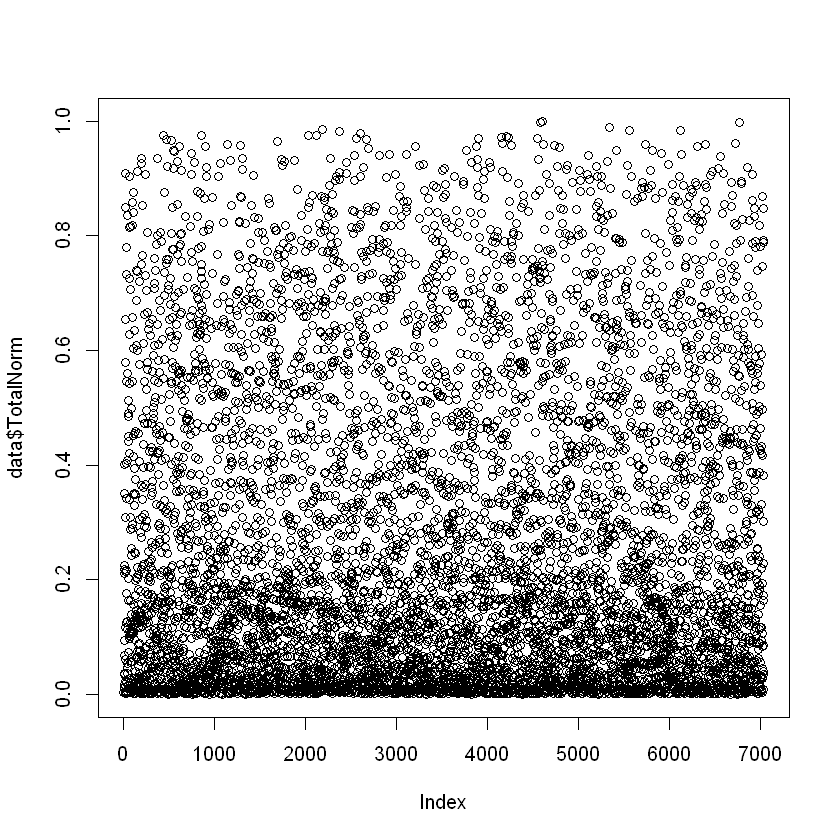

In [36]:
plot(data$TotalNorm)

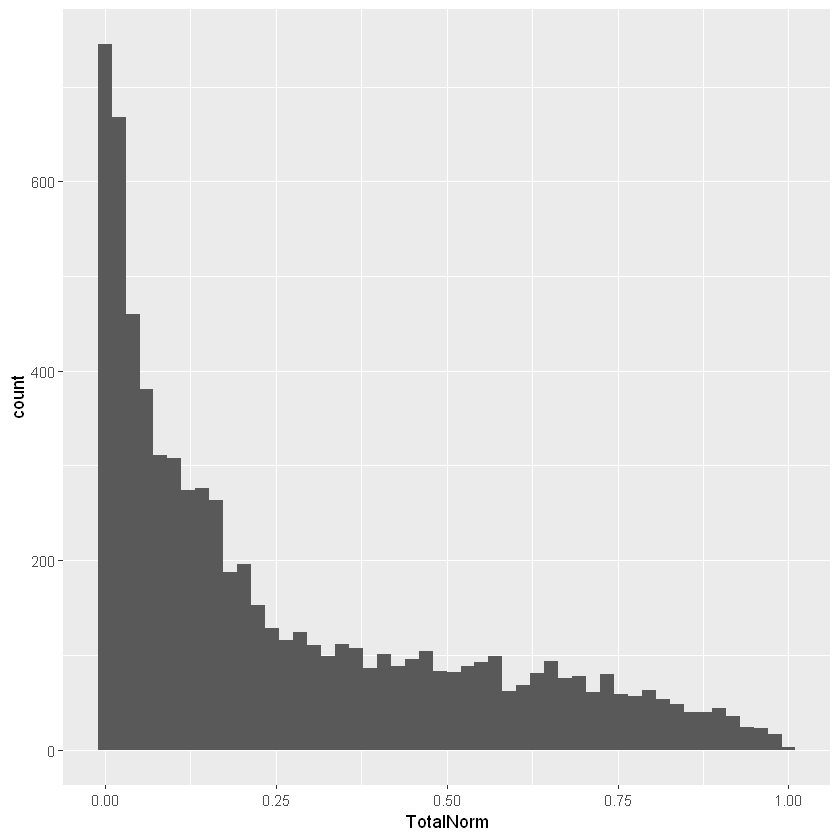

In [38]:
ggplot(data = data, aes(x = TotalNorm)) +
    geom_histogram(bins = 50)

In [40]:
standartize <- function(data) {    
    sdev = sd(data, na.rm = TRUE)  
    data <- (data - mean(data, na.rm = T)) / sdev
    return (data)    
}

In [45]:
data <- data |>
    mutate(TotalStand = standartize(TotalCharges))
data |>
 select(TotalCharges, TotalNorm, TotalStand) |>
 tail()

,TotalCharges,TotalNorm,TotalStand
,<dbl>,<dbl>,<dbl>
7038,1419.40,0.16343497,-0.3795379
7039,1990.50,0.22919353,-0.1275962
7040,7362.90,0.84779154,2.2424467
7041,346.45,0.03989153,-0.8528715
7042,306.60,0.03530306,-0.8704513
7043,6844.50,0.78810105,2.0137537


In [46]:
#install.packages("gridExtra")

package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	G:\Temp\Rtmpu4oTJw\downloaded_packages


In [49]:
library(gridExtra)

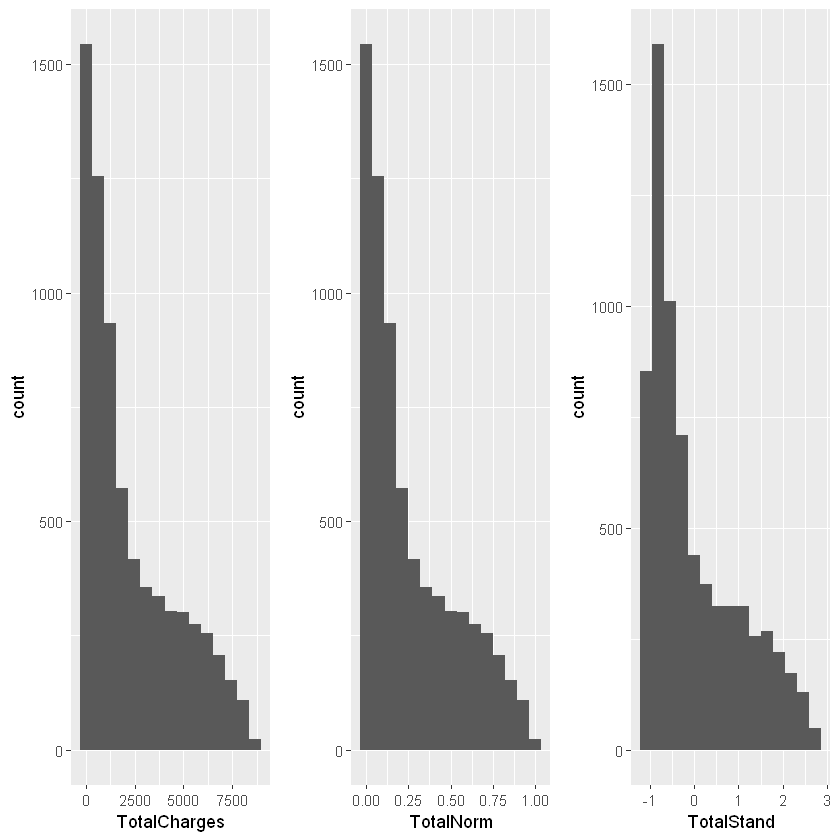

In [51]:
p1 <- ggplot(data = data, aes(x = TotalCharges)) +
        geom_histogram(bins = 15)
p2 <- ggplot(data = data, aes(x = TotalNorm)) +
        geom_histogram(bins = 15)
p3 <- ggplot(data = data, aes(x = TotalStand)) +
        geom_histogram(bins = 15)

grid.arrange(p1, p2, p3, ncol = 3)

In [53]:
scaled_charges <- scale(data$TotalCharges,
                        center = mean(data$TotalCharges),
                        scale = sd(data$TotalCharges))

In [55]:
scaled_charges[1:10]

[1] -0.9925401 -0.1721525 -0.9579979 -0.1936586 -0.9388078 -0.6437435
 [7] -0.1457275 -0.8725248  0.3380614  0.5330063

Warning message:
"Removed 11 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 11 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 11 rows containing non-finite values (`stat_bin()`)."


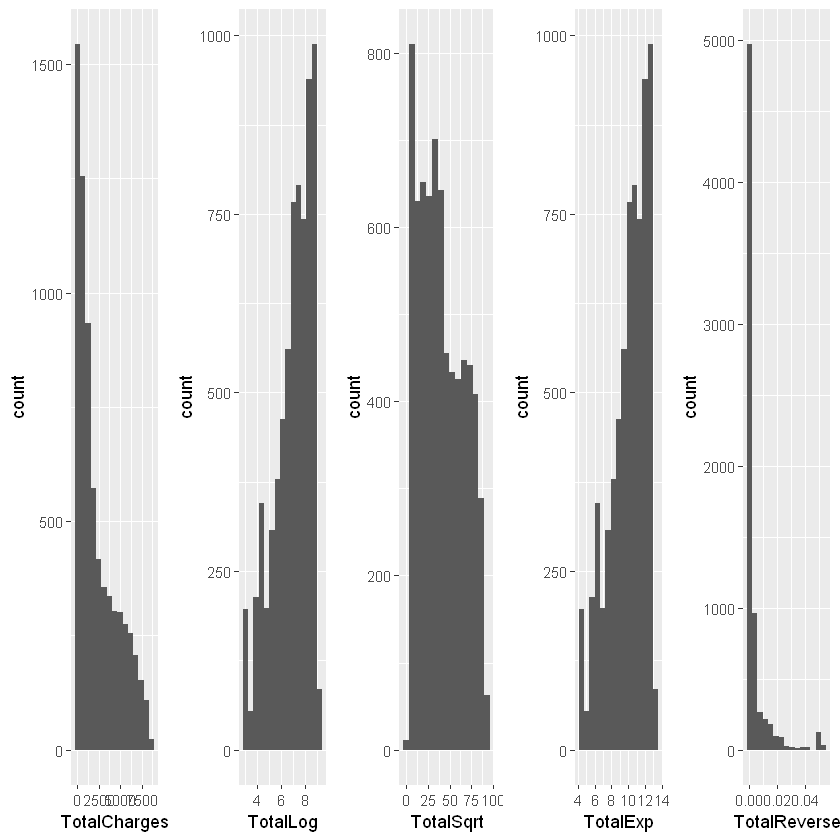

In [60]:
data_tmp <- data |>
    mutate(TotalLog = log(TotalCharges),
           TotalSqrt = sqrt(TotalCharges),
           TotalExp = log(TotalCharges, 2),
        TotalReverse = 1/TotalCharges)

p1 <- ggplot(data = data_tmp, aes(x = TotalCharges)) +
        geom_histogram(bins = 15)
p2 <- ggplot(data =data_tmp, aes(x = TotalLog)) +
        geom_histogram(bins = 15)
p3 <- ggplot(data = data_tmp, aes(x = TotalSqrt)) +
        geom_histogram(bins = 15)
p4 <- ggplot(data = data_tmp, aes(x = TotalExp)) +
        geom_histogram(bins = 15)
p5 <- ggplot(data = data_tmp, aes(x = TotalReverse)) +
        geom_histogram(bins = 15)

grid.arrange(p1, p2, p3, p4, p5, ncol = 5)

In [62]:
data |>
    select(MonthlyCharges, TotalCharges) |>
    head(6)

,MonthlyCharges,TotalCharges
,<dbl>,<dbl>
1,29.85,29.85
2,56.95,1889.50
3,53.85,108.15
4,42.30,1840.75
5,70.70,151.65
6,99.65,820.50


In [64]:
data <- data |>
    mutate(M2T = round(MonthlyCharges/TotalCharges, 2))
data |>
    select(MonthlyCharges, TotalCharges, M2T) |>
    head(6)

,MonthlyCharges,TotalCharges,M2T
,<dbl>,<dbl>,<dbl>
1,29.85,29.85,1.00
2,56.95,1889.50,0.03
3,53.85,108.15,0.50
4,42.30,1840.75,0.02
5,70.70,151.65,0.47
6,99.65,820.50,0.12


In [65]:
data <- data |>
    mutate(InternetService = as.factor(InternetService))
str(data)

'data.frame':	7043 obs. of  25 variables:
 $ customerID                                                 : chr  "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender                                                     : chr  "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen                                              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner                                                    : chr  "Yes" "No" "No" "No" ...
 $ Dependents                                                 : chr  "No" "No" "No" "No" ...
 $ tenure                                                     : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService                                               : chr  "No" "Yes" "Yes" "No" ...
 $ MultipleLines                                              : chr  "No phone service" "No" "No" "No phone service" ...
 $ InternetService                                            : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ O

In [67]:
data1 <- data |>
    select(gender, InternetService, TotalCharges, Churn)
data1 |> head()

,gender,InternetService,TotalCharges,Churn
,<chr>,<fct>,<dbl>,<chr>
1,Female,DSL,29.85,No
2,Male,DSL,1889.50,No
3,Male,DSL,108.15,Yes
4,Male,DSL,1840.75,No
5,Female,Fiber optic,151.65,Yes
6,Female,Fiber optic,820.50,Yes


In [69]:
unique(data$gender)

[1] "Female" "Male"

In [73]:
table(data$gender)


Female   Male 
  3488   3555 

In [75]:
#install.packages("gmodels")

In [78]:
library(gmodels)
CrossTable(data$gender, data$Churn)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  7043 

 
             | data$Churn 
 data$gender |        No |       Yes | Row Total | 
-------------|-----------|-----------|-----------|
      Female |      2549 |       939 |      3488 | 
             |     0.070 |     0.194 |           | 
             |     0.731 |     0.269 |     0.495 | 
             |     0.493 |     0.502 |           | 
             |     0.362 |     0.133 |           | 
-------------|-----------|-----------|-----------|
        Male |      2625 |       930 |      3555 | 
             |     0.069 |     0.190 |           | 
             |     0.738 |     0.262 |     0.505 | 
             |     0.507 |     0.498 |           | 
             |     0.373 |     0.132 |           | 
-------------|-----------|-----------|---

In [80]:
data1 <- data1 |>
    mutate(gender = ifelse(gender == "Male", 1, 0),
          Churn = ifelse(Churn == "Yes", 0, 1))
data1 |> head()

,gender,InternetService,TotalCharges,Churn
,<dbl>,<fct>,<dbl>,<dbl>
1,0,DSL,29.85,1
2,0,DSL,1889.50,1
3,0,DSL,108.15,1
4,0,DSL,1840.75,1
5,0,Fiber optic,151.65,1
6,0,Fiber optic,820.50,1


In [82]:
unique(data$InternetService)

[1] DSL         Fiber optic No         
Levels: DSL Fiber optic No

In [84]:
CrossTable(data$InternetService)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  7043 

 
            |         DSL | Fiber optic |          No | 
            |-------------|-------------|-------------|
            |        2421 |        3096 |        1526 | 
            |       0.344 |       0.440 |       0.217 | 
            |-------------|-------------|-------------|



 


In [87]:
#install.packages("caret")

In [89]:
library(caret)

In [91]:
dummy <- dummyVars("~ InternetService", data = data1)

In [92]:
data1 |> head()

,gender,InternetService,TotalCharges,Churn
,<dbl>,<fct>,<dbl>,<dbl>
1,0,DSL,29.85,1
2,0,DSL,1889.50,1
3,0,DSL,108.15,1
4,0,DSL,1840.75,1
5,0,Fiber optic,151.65,1
6,0,Fiber optic,820.50,1


In [94]:
predict(dummy, newdata = data1)

,InternetService.DSL,InternetService.Fiber optic,InternetService.No
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,0,1,0
8,1,0,0
9,0,1,0
10,1,0,0


In [96]:
str(data)

'data.frame':	7043 obs. of  25 variables:
 $ customerID                                                 : chr  "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender                                                     : chr  "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen                                              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner                                                    : chr  "Yes" "No" "No" "No" ...
 $ Dependents                                                 : chr  "No" "No" "No" "No" ...
 $ tenure                                                     : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService                                               : chr  "No" "Yes" "Yes" "No" ...
 $ MultipleLines                                              : chr  "No phone service" "No" "No" "No phone service" ...
 $ InternetService                                            : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ O

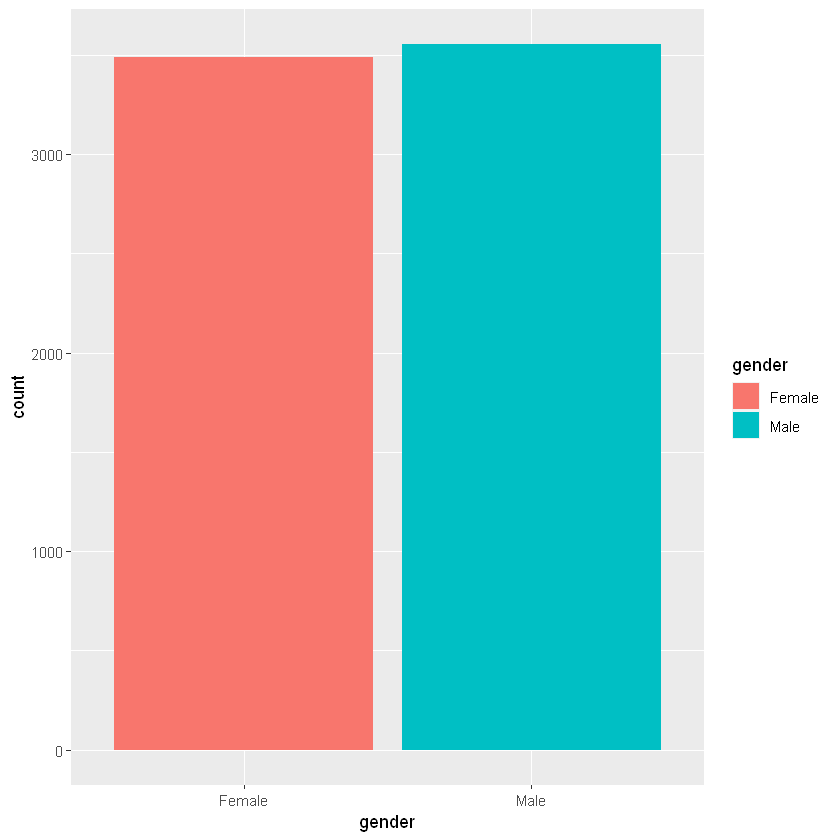

In [98]:
bar <- ggplot(data, aes(x = gender, fill=gender)) +
     geom_bar()
bar

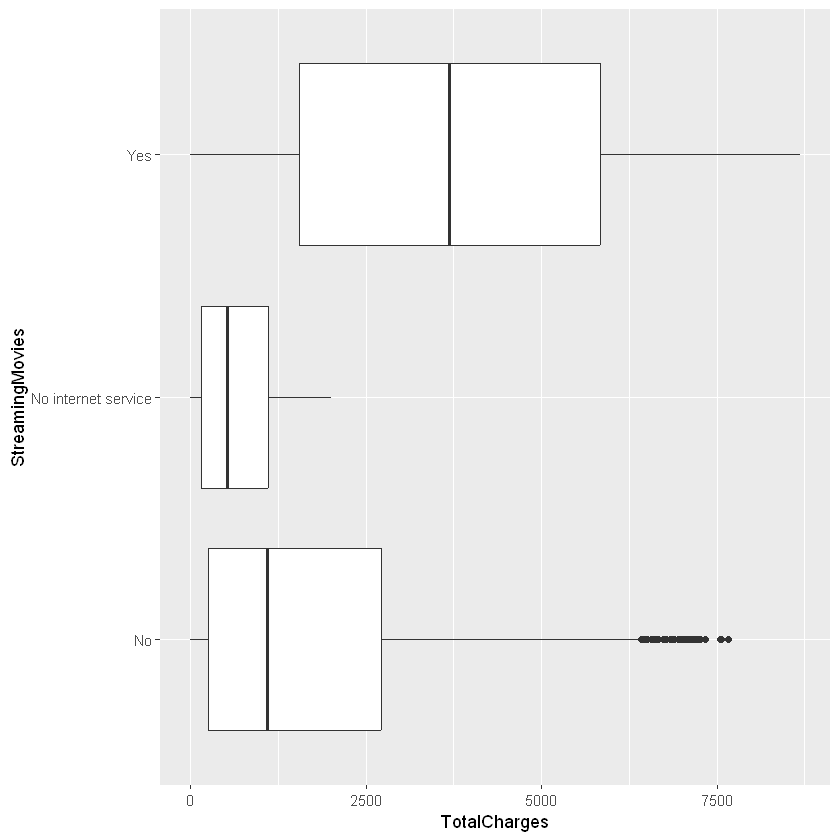

In [105]:
ggplot(data, aes(TotalCharges, StreamingMovies)) + geom_boxplot()

In [106]:
#install.packages("Hmisc")

also installing the dependencies 'checkmate', 'htmlTable', 'viridis', 'Formula'





  There are binary versions available but the source versions are later:
          binary source needs_compilation
checkmate  2.1.0  2.3.1              TRUE
htmlTable  2.4.1  2.4.2             FALSE
viridis    0.6.2  0.6.5             FALSE
Hmisc      5.0-1  5.1-2              TRUE

  Binaries will be installed
package 'checkmate' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'Hmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	G:\Temp\Rtmpu4oTJw\downloaded_packages


installing the source packages 'htmlTable', 'viridis'




In [108]:
library(Hmisc)

In [110]:
describe(data)

Warning message in w * sort(x - mean(x)):
"longer object length is not a multiple of shorter object length"


data 

 25  Variables      7043  Observations
--------------------------------------------------------------------------------
customerID 
       n  missing distinct 
    7043        0     7043 

lowest : 0002-ORFBO 0003-MKNFE 0004-TLHLJ 0011-IGKFF 0013-EXCHZ
highest: 9987-LUTYD 9992-RRAMN 9992-UJOEL 9993-LHIEB 9995-HOTOH
--------------------------------------------------------------------------------
gender 
       n  missing distinct 
    7043        0        2 
                        
Value      Female   Male
Frequency    3488   3555
Proportion  0.495  0.505
--------------------------------------------------------------------------------
SeniorCitizen 
       n  missing distinct     Info      Sum     Mean      Gmd 
    7043        0        2    0.408     1142   0.1621   0.2717 

--------------------------------------------------------------------------------
Partner 
       n  missing distinct 
    7043        0        2 
                      
Value         No   Yes
Frequency   36

In [112]:
#install.packages("psych")


  There is a binary version available but the source version is later:
      binary source needs_compilation
psych  2.3.3  2.4.3             FALSE



installing the source package 'psych'




In [114]:
library(psych)

In [115]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
customerID*,1,7043,3.522000e+03,2033.2833054,3522.0000000,3522.00000000,2610.8586000,1.000000,7043.000000,7042.000000,0.00000000,-1.2005112,24.228082879
gender*,2,7043,1.504756e+00,0.5000129,2.0000000,1.50594499,0.0000000,1.000000,2.000000,1.000000,-0.01902279,-1.9999220,0.005958025
SeniorCitizen,3,7043,1.621468e-01,0.3686116,0.0000000,0.07772848,0.0000000,0.000000,1.000000,1.000000,1.83285177,1.3595387,0.004392281
Partner*,4,7043,1.483033e+00,0.4997475,1.0000000,1.47879326,0.0000000,1.000000,2.000000,1.000000,0.06789345,-1.9956738,0.005954863
Dependents*,5,7043,1.299588e+00,0.4581102,1.0000000,1.24951198,0.0000000,1.000000,2.000000,1.000000,0.87482582,-1.2348551,0.005458723
tenure,6,7043,3.237115e+01,24.5594810,29.0000000,31.42786158,32.6172000,0.000000,72.000000,72.000000,0.23943773,-1.3876966,0.292644483
PhoneService*,7,7043,1.903166e+00,0.2957522,2.0000000,2.00000000,0.0000000,1.000000,2.000000,1.000000,-2.72599140,5.4318004,0.003524108
MultipleLines*,8,7043,1.940508e+00,0.9485540,2.0000000,1.92564330,1.4826000,1.000000,3.000000,2.000000,0.11866889,-1.8782148,0.011302727
InternetService*,9,7043,1.872923e+00,0.7377963,2.0000000,1.84117125,1.4826000,1.000000,3.000000,2.000000,0.20533596,-1.1460705,0.008791392
